# Presentation

In this presentation, we are not going to solve a specific exercice but we will go thru the Dijkstra Algorithm. Instead of trying to present it, you should definitely take a look to <a href="https://tech.io/playgrounds/1608/shortest-paths-with-dijkstras-algorithm/introduction" target="_blank">this link</a>. This presentation made on tech.io helps you understand the process of this algorithm and now we gonna code it on a random graph.

# Code

In [1]:
import math
import heapq

In [2]:
# Let's create a graph
G = {
    'A' : {'B' : 5, 'C' : 1},
    'B' : {'A' : 5, 'C' : 8, 'E' : 3},
    'C' : {'A' : 1, 'B' : 8, 'D' : 5},
    'D' : {'C' : 5, 'E' : 14, 'G' : 6},
    'E' : {'B' : 3, 'D' : 14, 'F' : 3, 'G' : 21},
    'F' : {'E' : 3},
    'G' : {'D' : 6, 'E' : 21}
}

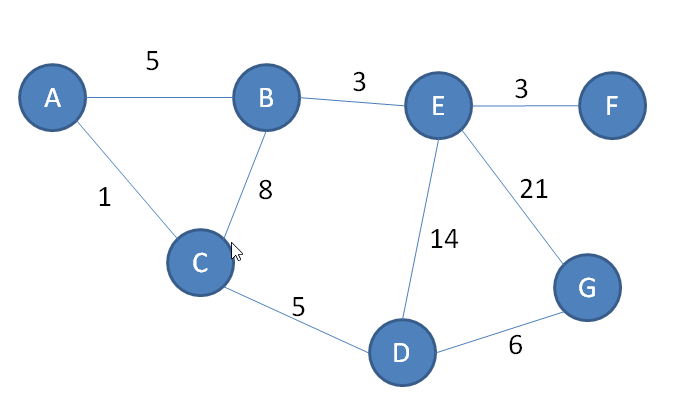

Now let's say we start from F to G.

#### Attention, all weights for paths must be positive or null but not negative !

In [3]:
def dijkstra(graph, source):
    n = len(graph)
    prec = {x : None for x in graph.keys()}
    visited = {x : False for x in graph.keys()}
    dist_to_point = {x: float('inf') for x in graph.keys()}    # set all distances infinite
    dist_to_point[source] = 0                                  # only the source point must have a weight of 0 at start
    heap = [(0, source)]                                       # Queue of all points to visit. Only source as we start from it with a distance of 0
    while heap:                                                # while we have points to visit
        dist_node, node = heapq.heappop(heap)                  # just to extract the point with the smallest distance
        if not visited[node]:
            visited[node] = True                               # mark the point as visited now, it doesn't matter
            for neighbor in graph[node]:
                temp_dist = dist_node + graph[node][neighbor]  # distance to reach the neighbor from the node point
                if temp_dist < dist_to_point[neighbor]:        # if lower, we can save this path
                    dist_to_point[neighbor] = temp_dist
                    prec[neighbor] = node
                    heapq.heappush(heap, (dist_to_point[neighbor], neighbor)) # we add neighbor in the queu to visit
    return dist_to_point, prec

In [4]:
distances, path = dijkstra(G, 'F')
print(path)

{'A': 'B', 'B': 'E', 'C': 'A', 'D': 'E', 'E': 'F', 'F': None, 'G': 'D'}


Now we get the <b>shortest</b> distance from F to any other points and the previous point to take to go on the expected point. We can now reconstruct the complete path

In [5]:
complete_path = ['G']
previous = path['G']
while previous != 'F':
    complete_path.append(previous)
    previous = path[previous]
complete_path.append(previous)
print(" -> ".join(complete_path[::-1]))

F -> E -> D -> G


We can check it tooks the shortest path (23 long). There were longer paths but also a second one with the same distance. It hasn't been chosen because there is more node and when we explored the neighbor of point C, the point D was already set with the same distance. If we validate the path also when distance is equal we have:

In [6]:
def dijkstra_2(graph, source):
    n = len(graph)
    prec = {x : None for x in graph.keys()}
    visited = {x : False for x in graph.keys()}
    dist_to_point = {x: float('inf') for x in graph.keys()}    # set all distances infinite
    dist_to_point[source] = 0             # only the source point must have a weight of 0 at start
    heap = [(0, source)]                  # Queue of all points to visit. Only source as we start from it with a distance of 0
    while heap:                           # while we have points to visit
        dist_node, node = heapq.heappop(heap)   # just to extract the point with the smallest distance
        if not visited[node]:
            visited[node] = True
            for neighbor in graph[node]:
                temp_dist = dist_node + graph[node][neighbor]
                if temp_dist <= dist_to_point[neighbor]:
                    dist_to_point[neighbor] = temp_dist
                    prec[neighbor] = node
                    heapq.heappush(heap, (dist_to_point[neighbor], neighbor))
    return dist_to_point, prec

In [7]:
distances, path = dijkstra_2(G, 'F')
print(path)

{'A': 'B', 'B': 'E', 'C': 'A', 'D': 'C', 'E': 'F', 'F': None, 'G': 'D'}


In [8]:
complete_path = ['G']
previous = path['G']
while previous != 'F':
    complete_path.append(previous)
    previous = path[previous]
complete_path.append(previous)
print(" -> ".join(complete_path[::-1]))

F -> E -> B -> A -> C -> D -> G


We get the 2nd path possible to go to G from F.